# DeepLearning project with Tensorflow and MNIST

## Data Analysis

In [49]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.colors as mcolors

Here are some settings for the models, so that they have the same conditions.

In [50]:
batch_size = 32
epochs = 50

train set size:  60000  | test set size:  10000


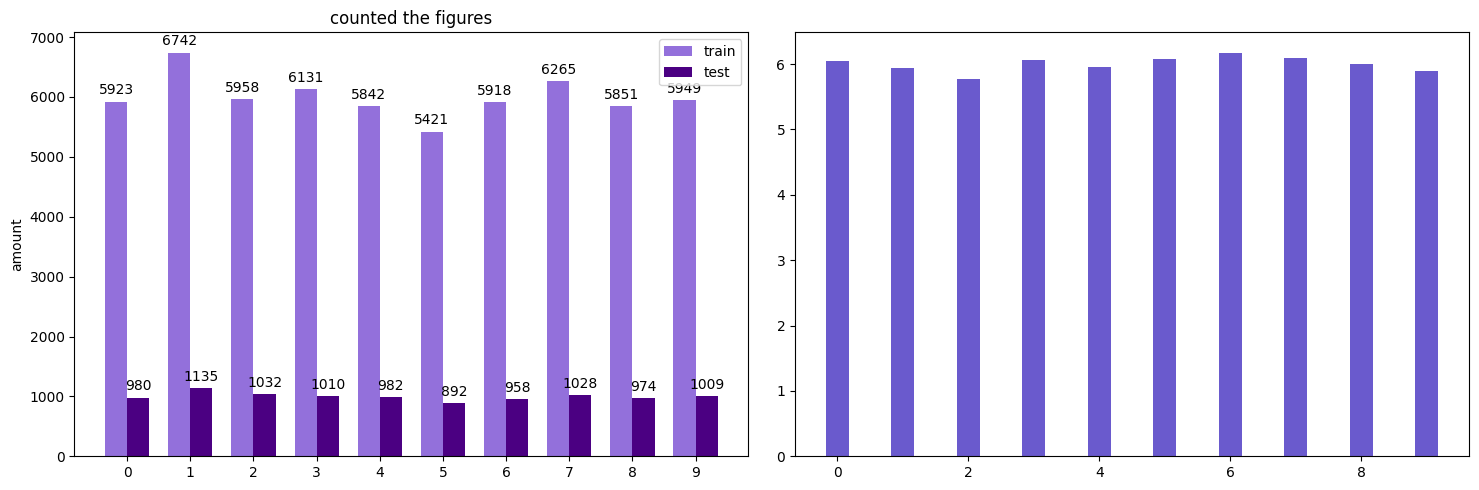

In [51]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

figure_train, count_train = np.unique(y_train, return_counts=True)
figure_test, count_test = np.unique(y_test, return_counts=True)
ratio = count_train/count_test
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
size_train = y_train.size
size_test = y_test.size
print("train set size: ", size_train, " | test set size: ", size_test)

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(1,2, figsize=(15, 5))
rects1 = ax[0].bar(x - width/2, count_train, width, label='train', color='mediumpurple')
rects2 = ax[0].bar(x + width/2, count_test, width, label='test', color='indigo')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[0].set_ylabel('amount')
ax[0].set_title('counted the figures')
ax[0].set_xticks(x, labels)
ax[0].legend()

ax[0].bar_label(rects1, padding=3)
ax[0].bar_label(rects2, padding=3)

fig.tight_layout()

ax[1].bar(x, ratio, width, label='train', color='slateblue')

plt.show()

Here you can see the distribution of the figures. They are not evenly distributed. In the training set (in blue) 1's are the most with 6742 and 5's are fewest with 5421. The test set is shown in orange. Let's have a loot at the ratios. To do so, the amount of train figures is divided by the amount of test figures.

You can see the ratios are around 6, like expected because there are 60000 train and 10000 test figures. The conclusion is that the distribution of the figure amounts of both sets are very similar.


 Plot of the first 25 samples in the MNIST training set


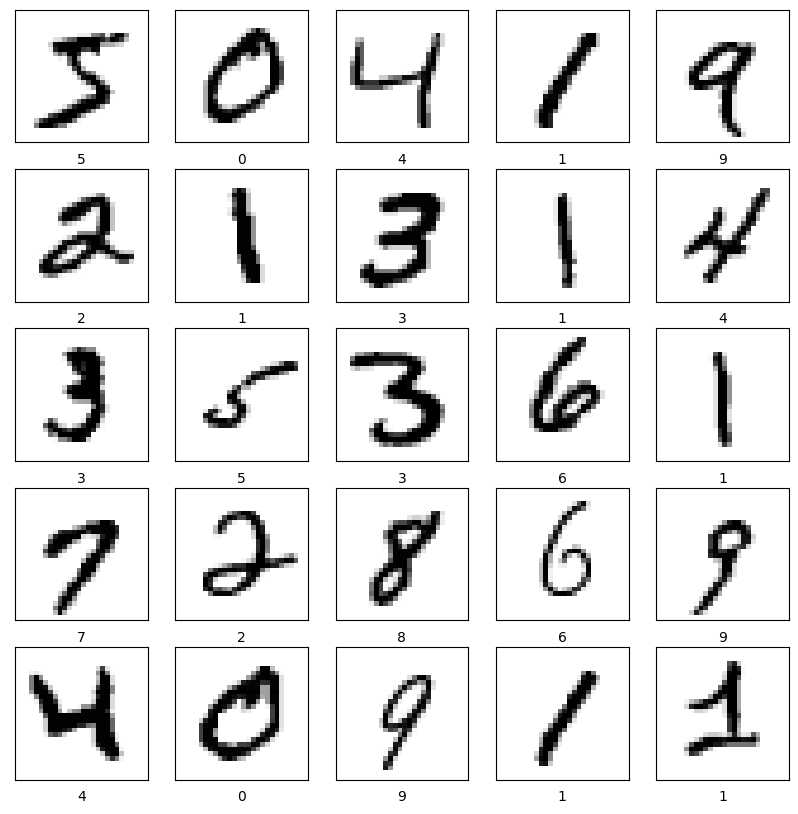

In [52]:
print('\n Plot of the first 25 samples in the MNIST training set')
numbers_to_display = 25
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

## Explainability


Starting with this basic model for reference. It includes just an input layer with 28 x 28 values and a dense (output) layer with 10 units. For comparability, these layers are gone be the same for the following models and this is the basic reference model to discuss changes.

In [53]:
model_ref = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model_ref.compile(
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_ref = model_ref.fit(
    x=x_train,
    y=y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test,y_test),
)

Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 9.6446 - accuracy: 0.8387 - val_loss: 6.4353 - val_accuracy: 0.8728
Epoch 2/50
1875/1875 [==============================] - 3s 2ms/step - loss: 6.3511 - accuracy: 0.8743 - val_loss: 6.2123 - val_accuracy: 0.8754
Epoch 3/50
1875/1875 [==============================] - 3s 2ms/step - loss: 5.7398 - accuracy: 0.8802 - val_loss: 6.3224 - val_accuracy: 0.8627
Epoch 4/50
1875/1875 [==============================] - 3s 2ms/step - loss: 5.5249 - accuracy: 0.8814 - val_loss: 5.0891 - val_accuracy: 0.8957
Epoch 5/50
1875/1875 [==============================] - 3s 2ms/step - loss: 5.4104 - accuracy: 0.8834 - val_loss: 4.9775 - val_accuracy: 0.8935
Epoch 6/50
1875/1875 [==============================] - 3s 2ms/step - loss: 5.2785 - accuracy: 0.8836 - val_loss: 5.2005 - val_accuracy: 0.8897
Epoch 7/50
1875/1875 [==============================] - 3s 2ms/step - loss: 5.2149 - accuracy: 0.8859 - val_loss: 4.9043 - val_accuracy:

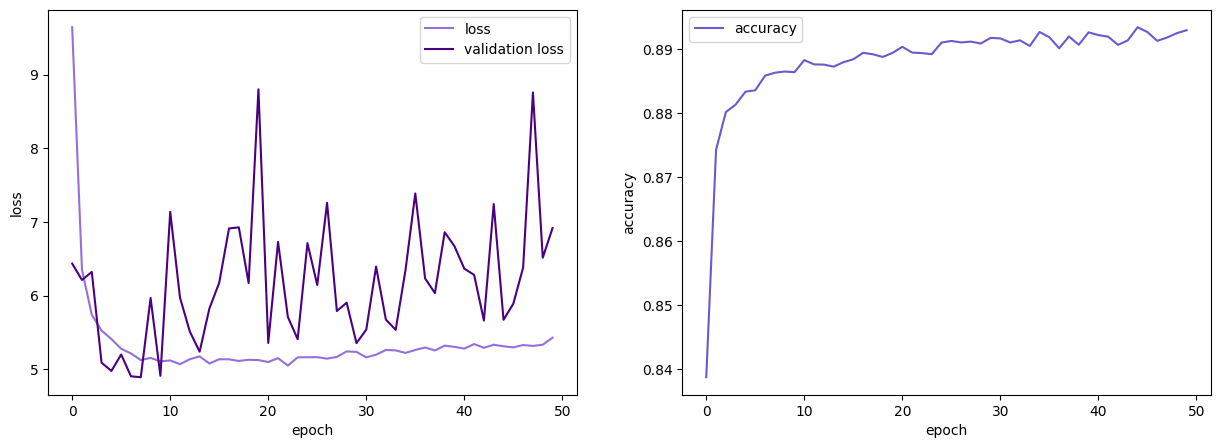

In [54]:
fig, axs = plt.subplots(1,2, figsize=(15, 5))

axs[0].plot(history_ref.history["loss"], color='mediumpurple')
axs[0].plot(history_ref.history["val_loss"], color='indigo')
# axs[0].ylabel("loss")
# axs[0].xlabel("epoch")
# axs[0].title("model loss")
axs[0].legend(["loss", "validation loss"], loc="best")
axs[0].set_xlabel('epoch')
axs[0].set_ylabel('loss')


axs[1].plot(history_ref.history["accuracy"], color='slateblue')
# axs[1].xlabel("epoch")
# axs[1].title("model accuracy")
axs[1].legend(["accuracy"], loc="best")
axs[1].set_xlabel('epoch')
axs[1].set_ylabel('accuracy')

plt.show()

This graph on the left is showing the loss of the test set and the loss of the validation set. On the right you can see the accuracy of the model.
The next models are keras core layers.

In [55]:
model_dense = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model_activation = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model_masking = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Masking(),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model_lambda = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Lambda(lambda x: x ** 2),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model_dense.compile(
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_activation.compile(
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_masking.compile(
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_lambda.compile(
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("\nStarting to train model with dense layer")
history_dense = model_dense.fit(
    x=x_train,
    y=y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test,y_test),
)

print("\nStarting to train model with activation layer")
history_activation = model_activation.fit(
    x=x_train,
    y=y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test,y_test),
)

print("\nStarting to train model with masking layer")
history_masking = model_masking.fit(
    x=x_train,
    y=y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test,y_test),
)

print("\nStarting to train model with lambda layer")
history_lambda = model_masking.fit(
    x=x_train,
    y=y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test,y_test),
)



Starting to train model with dense layer
Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 7.4784 - accuracy: 0.8212 - val_loss: 3.0544 - val_accuracy: 0.8859
Epoch 2/50
1875/1875 [==============================] - 3s 2ms/step - loss: 2.5506 - accuracy: 0.8694 - val_loss: 2.2332 - val_accuracy: 0.8694
Epoch 3/50
1875/1875 [==============================] - 3s 2ms/step - loss: 1.3652 - accuracy: 0.8779 - val_loss: 0.9649 - val_accuracy: 0.8823
Epoch 4/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7220 - accuracy: 0.8830 - val_loss: 0.4540 - val_accuracy: 0.8944
Epoch 5/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4509 - accuracy: 0.8871 - val_loss: 0.4193 - val_accuracy: 0.8819
Epoch 6/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4170 - accuracy: 0.8887 - val_loss: 0.3785 - val_accuracy: 0.9029
Epoch 7/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4126 - accuracy:

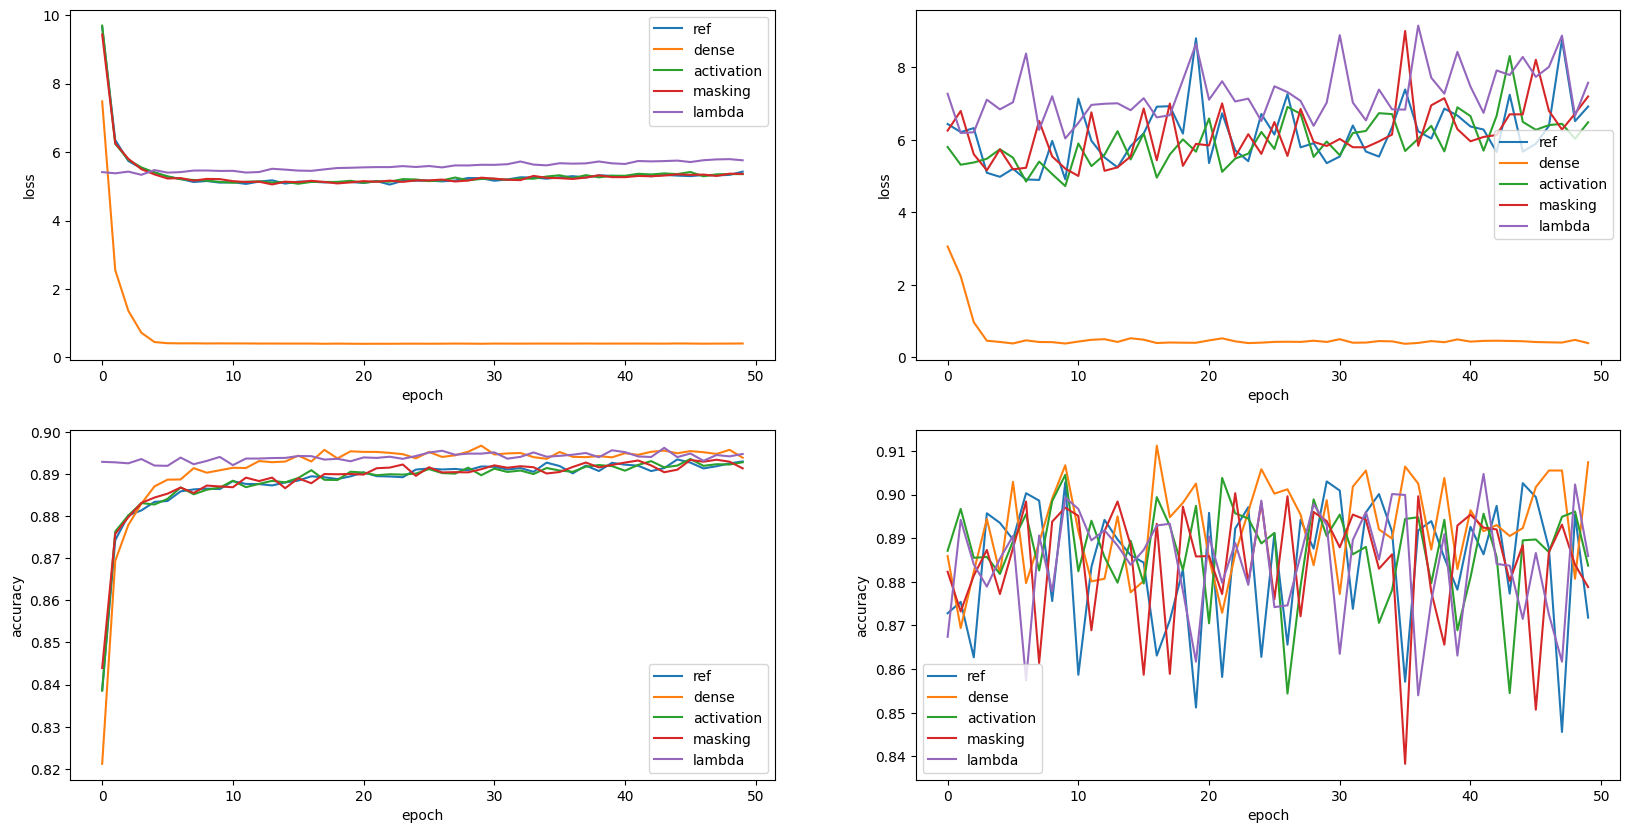

In [56]:
fig, axs = plt.subplots(2,2, figsize=(20, 10))

axs[0,0].plot(history_ref.history["loss"])
axs[0,0].plot(history_dense.history["loss"])
axs[0,0].plot(history_activation.history["loss"])
axs[0,0].plot(history_masking.history["loss"])
axs[0,0].plot(history_lambda.history["loss"])

axs[0,0].legend(["ref", "dense", "activation", "masking", "lambda"], loc="best")
axs[0,0].set_xlabel('epoch')
axs[0,0].set_ylabel('loss')


axs[0,1].plot(history_ref.history["val_loss"])
axs[0,1].plot(history_dense.history["val_loss"])
axs[0,1].plot(history_activation.history["val_loss"])
axs[0,1].plot(history_masking.history["val_loss"])
axs[0,1].plot(history_lambda.history["val_loss"])

axs[0,1].legend(["ref", "dense", "activation", "masking", "lambda"], loc="best")
axs[0,1].set_xlabel('epoch')
axs[0,1].set_ylabel('loss')


axs[1,0].plot(history_ref.history["accuracy"])
axs[1,0].plot(history_dense.history["accuracy"])
axs[1,0].plot(history_activation.history["accuracy"])
axs[1,0].plot(history_masking.history["accuracy"])
axs[1,0].plot(history_lambda.history["accuracy"])

axs[1,0].legend(["ref", "dense", "activation", "masking", "lambda"], loc="best")
axs[1,0].set_xlabel('epoch')
axs[1,0].set_ylabel('accuracy')


axs[1,1].plot(history_ref.history["val_accuracy"])
axs[1,1].plot(history_dense.history["val_accuracy"])
axs[1,1].plot(history_activation.history["val_accuracy"])
axs[1,1].plot(history_masking.history["val_accuracy"])
axs[1,1].plot(history_lambda.history["val_accuracy"])

axs[1,1].legend(["ref", "dense", "activation", "masking", "lambda"], loc="best")
axs[1,1].set_xlabel('epoch')
axs[1,1].set_ylabel('accuracy')

plt.show()

## Performance